# Discussion 4: Visualizing Bigfoot

Many of you have probably heard of Bigfoot before. It's a mysterious ape-like creature that is said to live in North American forests. Most doubt it's existence, but a passionate few swear that bigfoot is real. In this discussion, you will be working with a dataset on bigfoot sightings, visualizing variable distributions and combinations thereof to better understand how/when/where bigfoot is reportedly spotted, and possibly either confirm or cast doubt on its existence. The bigfoot data contains a ton of variables about each reported bigfoot spotting, including location information, weather, and moon phase.

In [2]:
# Importing packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading bigfoot data

url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-09-13/bigfoot.csv'
df = pd.read_csv(url)

This dataset is extremely messy, with observations missing many values across multiple columns. This is normally the case with data based on citizen reports (many do not fill out all required fields). For the purposes of this discussion, we will drop all observations with any missing values and some unneeded columns. However, note this is not a good practice and you should almost never do this in real life!

In [4]:
# Drop unneeded rows and observations with missing values

bigfoot = df.dropna().rename({'temperature_high':'temp_high' ,'temperature_low':'temp_low'},axis = 1)
bigfoot = bigfoot.drop(['observed', 'location_details', 'county', 'state', 'title',
       'latitude', 'longitude', 'number', 'classification', 'geohash',
       'temperature_mid', 'dew_point','precip_probability', 'precip_type','summary', 
       'wind_bearing'], axis = 1)

Here are the first few entries of the `bigfoot` table:

In [5]:
bigfoot.head(5)

,season,date,temp_high,temp_low,humidity,cloud_cover,moon_phase,precip_intensity,pressure,uv_index,visibility,wind_speed
10,Summer,2016-06-07,74.69,53.80,0.79,0.61,0.10,0.0010,998.87,6.0,9.70,0.49
21,Summer,2015-10-02,49.06,44.24,0.87,0.93,0.67,0.0092,1022.92,3.0,9.16,2.87
32,Fall,2009-10-31,69.01,34.42,0.77,0.81,0.42,0.0158,1011.48,3.0,1.97,3.94
34,Summer,1978-07-15,68.56,63.05,0.88,0.80,0.33,0.0285,1014.70,5.0,5.71,5.47
55,Summer,2015-11-26,20.49,5.35,0.65,0.08,0.54,0.0002,1037.98,1.0,10.00,0.40


### Task 1

Let's first look at distributions of individual quantitative variables. Let's say we're interested in `wind_speed`. 

a) Which of the following are appropriate visualizations for plotting the distribution of a quantitative continuous variable? (Select all that applies)

A. Pie charts

B. Kernel Density Plot

C. Scatter plot

D. Boxplot

E. Histogram

F. Hexplots

*Solution: a **histogram**, **KDE**, or **boxplot** are probably the best choices for this question. You should be careful though with KDE: all of these variables are bounded in some way and KDE will show positive density for values that are impossible to observe (like negative wind speed)*

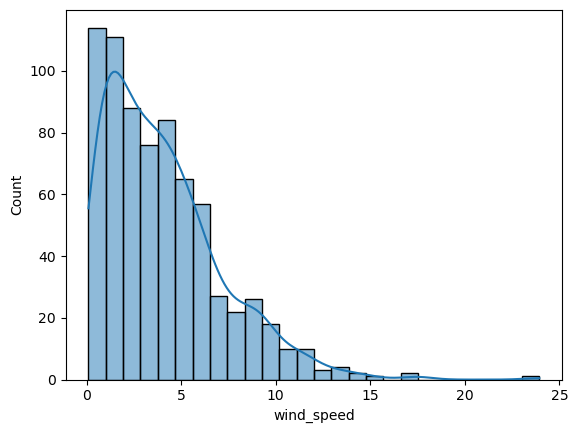

In [26]:
sns.histplot(data = bigfoot, x = 'wind_speed', kde = True);

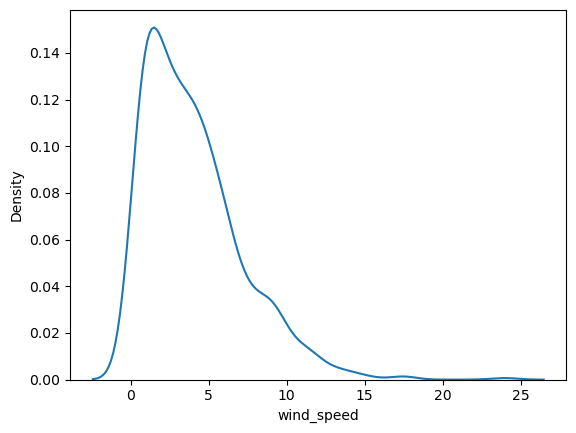

In [27]:
sns.kdeplot(data = bigfoot, x = 'wind_speed');

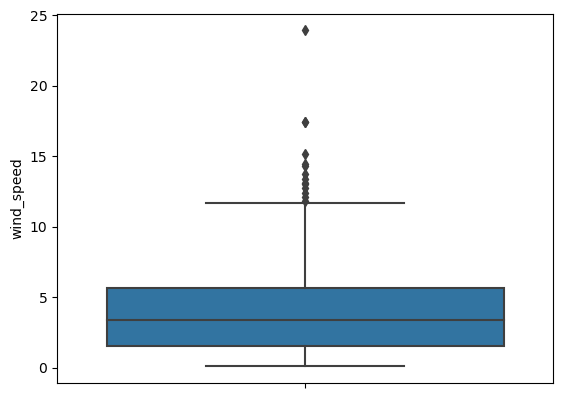

In [28]:
sns.boxplot(data = bigfoot, y = 'wind_speed');

b) Write a line of code that produces the visualization that depicts the variable's distribution (example shown below). **Hint**: Use `seaborn(sns.histplot)/matplotlib(plt.hist)`.

![](https://drive.google.com/uc?export=view&id=1wlIyJjkdzxOoppv5400m3OyXwWdif3yO)

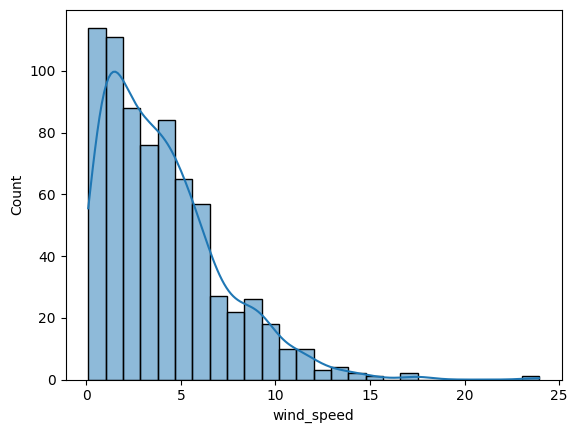

In [6]:
sns.histplot(data = bigfoot, x = 'wind_speed', kde = True);

###  Task 2) 

Now, let's see how two variables might relate to each other when bigfoot is reportedly out. Fill in the function to produce a visualization that shows what combinations of values of `moon_phase` and `wind_speed` are most common when bigfoot is spotted (example shown below). 

![](https://drive.google.com/uc?export=view&id=1Th31v4jb9i43YrsfhV-HUpls48XszWjD)

<Axes: xlabel='moon_phase', ylabel='wind_speed'>

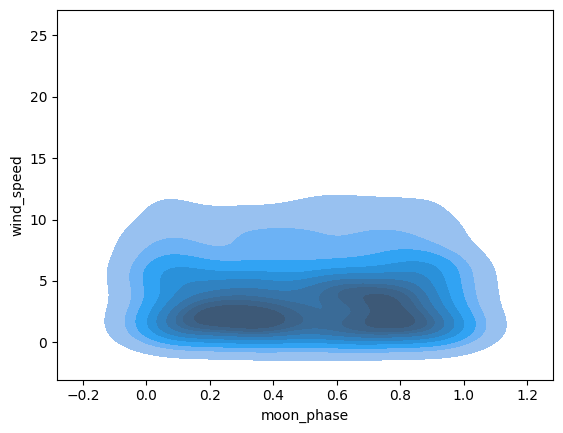

In [10]:
sns.kdeplot(data = bigfoot, x = "moon_phase", y = "wind_speed", shade = True);


### Task 3) 

Now, let's look at some qualitative variables. Write a line of code that produces a visualization that shows the distribution of bigfoot sightings across the variable `season` (example shown below). **hint:** Use `seaborn(sns.countplot)/matplotlib(plt.bar)`.

![](https://drive.google.com/uc?export=view&id=1epvnkLB4Ncqg719_g8guYb5UUC7_Qd2i)

*Solution: a `countplot` or a `barplot` for the `season` variable is probably the best bet here since we're just looking for counts of observations across categories across categorical variables.*

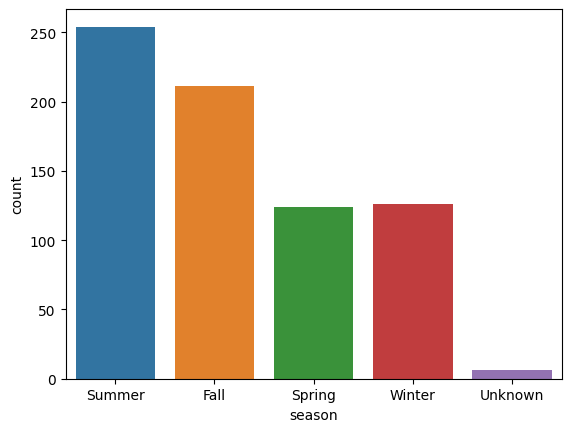

In [11]:
sns.countplot(data = bigfoot, x = 'season');

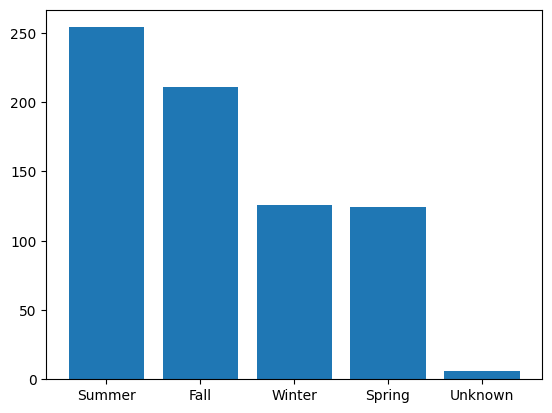

In [13]:
season_counts = bigfoot["season"].value_counts()
plt.bar(season_counts.index, season_counts.values);